In [1]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=5f05f532c027931c14e5223d23b3589a4dbe4287c0ef56a91b1996f8915a393e
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
from tpot import TPOTRegressor
import pandas as pd

In [3]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s45f3t1g0.01py1-y1e2+y2e2-y1e2+y3e2.csv to 500s45f3t1g0.01py1-y1e2+y2e2-y1e2+y3e2.csv


In [4]:
df = pd.read_csv("500s45f3t1g0.01py1-y1e2+y2e2-y1e2+y3e2.csv")

In [ ]:
#df = pd.read_csv("500s90f3t1g0.01py1y2y3.csv")

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X39,X40,X41,X42,X43,X44,X45,Y1,Y2,Y3
0,0.148245,0.690794,0.334530,0.430207,0.095862,0.632664,0.666513,0.778282,0.024214,0.639944,...,0.175833,0.194173,0.676948,0.828419,0.000000,0.972649,0.332361,0.729746,0.178687,0.189706
1,0.927101,0.172244,0.310581,0.785614,0.089278,0.201279,0.557560,0.535545,0.124361,0.758937,...,0.808341,0.969207,0.958184,0.370214,0.192284,0.178841,0.034308,0.802411,0.318523,0.318131
2,0.121547,0.582333,0.259651,0.579993,0.613792,0.035723,0.255070,0.586253,0.181495,0.300942,...,0.526003,0.181200,0.410373,0.534493,0.162693,0.372850,0.595313,0.736636,0.190399,0.190361
3,0.215753,0.844772,0.792270,0.655078,0.999813,0.935926,0.221324,0.092359,0.992099,0.174270,...,0.689232,0.030646,0.906751,0.013638,0.696406,0.833038,0.242577,0.263725,0.236705,0.248869
4,0.921152,0.256915,0.453706,0.228614,0.792584,0.447874,0.846248,0.947821,0.231551,0.179456,...,0.511437,0.852783,0.801084,0.305173,0.102824,0.655862,0.925997,0.689394,0.118679,0.132321


In [ ]:
#X_cols = [
#  'X1',
#  'X2',
#  'X3',
#  'X4',
#]
#
#X = df[X_cols]

In [6]:
y_col = [
    'Y1',
    'Y2',
    'Y3',
 ]
y = df[y_col]

In [7]:
y.head()

,Y1,Y2,Y3
0,0.729746,0.178687,0.189706
1,0.802411,0.318523,0.318131
2,0.736636,0.190399,0.190361
3,0.263725,0.236705,0.248869
4,0.689394,0.118679,0.132321


In [8]:
X = df[df.columns.drop(y)]

In [9]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,0.148245,0.690794,0.334530,0.430207,0.095862,0.632664,0.666513,0.778282,0.024214,0.639944,...,0.597658,0.600728,0.147195,0.175833,0.194173,0.676948,0.828419,0.000000,0.972649,0.332361
1,0.927101,0.172244,0.310581,0.785614,0.089278,0.201279,0.557560,0.535545,0.124361,0.758937,...,0.834886,0.467077,0.827276,0.808341,0.969207,0.958184,0.370214,0.192284,0.178841,0.034308
2,0.121547,0.582333,0.259651,0.579993,0.613792,0.035723,0.255070,0.586253,0.181495,0.300942,...,0.123077,0.455303,0.023623,0.526003,0.181200,0.410373,0.534493,0.162693,0.372850,0.595313
3,0.215753,0.844772,0.792270,0.655078,0.999813,0.935926,0.221324,0.092359,0.992099,0.174270,...,0.226689,0.101217,0.738405,0.689232,0.030646,0.906751,0.013638,0.696406,0.833038,0.242577
4,0.921152,0.256915,0.453706,0.228614,0.792584,0.447874,0.846248,0.947821,0.231551,0.179456,...,0.550222,0.733991,0.604191,0.511437,0.852783,0.801084,0.305173,0.102824,0.655862,0.925997


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [ ]:
import matplotlib.pyplot as plt  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [12]:
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.21079223161326743

In [13]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.1345675641698595
MAE for morrfr is 0.0971795405612676


In [15]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0003964214582225886

Generation 2 - Current best internal CV score: -0.0003964214582225886

Generation 3 - Current best internal CV score: -0.0003964214582225886

Generation 4 - Current best internal CV score: -0.0003964214582225886

Generation 5 - Current best internal CV score: -0.00037377036485840173

Best pipeline: ElasticNetCV(LinearSVR(FastICA(input_matrix, tol=0.6000000000000001), C=1.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.0001), l1_ratio=0.5, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01616310519524666

Generation 2 - Current best internal CV score: -0.01608681485295238

Generation 3 - Current best internal CV score: -0.01608681485295238

Generation 4 - Current best internal CV score: -0.015843984455257615

Generation 5 - Current best internal CV score: -0.015843984455257615

Best pipeline: RidgeCV(MinMaxScaler(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.016250331247555552

Generation 2 - Current best internal CV score: -0.016250331247555552

Generation 3 - Current best internal CV score: -0.016250331247555552

Generation 4 - Current best internal CV score: -0.016250331247555552

Generation 5 - Current best internal CV score: -0.011544340912072407

Best pipeline: RidgeCV(LassoLarsCV(Normalizer(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), norm=l2), normalize=True))
RMSE for TPOT-MO is 0.1345675641698595
MAE for TPOT-MO is 0.0971795405612676


0.5015310470525909

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)


0.29516680605995577

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae
from sklearn.metrics import mean_squared_error as morlsvr_rmse
morlsvr_rmse1=math.sqrt(morlsvr_rmse(y_test, y_pred))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae(y_test, y_pred)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.12485017595462768
MAE for morlsvr is 0.06744683821916371


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
from tpot import decorators
decorators.MAX_EVAL_SECS = 240

In [ ]:
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.000396422870099867

Generation 2 - Current best internal CV score: -0.0003964228700998669

Generation 3 - Current best internal CV score: -0.0003964228700998669

Generation 4 - Current best internal CV score: -0.00036477877843363196

Generation 5 - Current best internal CV score: -0.00036477877843363196

Best pipeline: LinearSVR(FastICA(input_matrix, tol=0.8), C=25.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0007859029952997915

Generation 2 - Current best internal CV score: -0.0007859029952997915

Generation 3 - Current best internal CV score: -0.0007469752992824127

Generation 4 - Current best internal CV score: -0.0007469752992824127

Generation 5 - Current best internal CV score: -0.0007469752992824127

Best pipeline: XGBRegressor(LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=1e-05), learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.3, verbosity=0)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00012710228926954693

Generation 2 - Current best internal CV score: -0.00012710228926954693

Generation 3 - Current best internal CV score: -0.00011927653347427066

Generation 4 - Current best internal CV score: -0.00011671204778617242

Generation 5 - Current best internal CV score: -0.00011366350627672218

Best pipeline: ElasticNetCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), l1_ratio=0.9500000000000001, tol=1e-05)


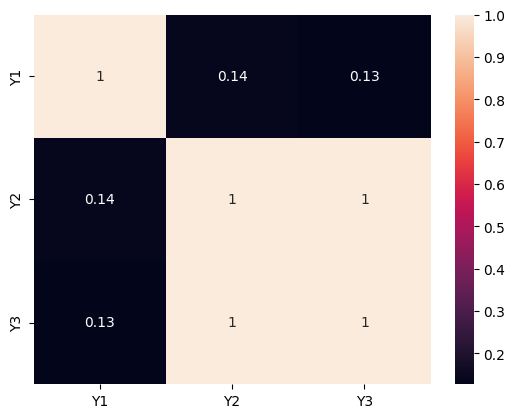

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

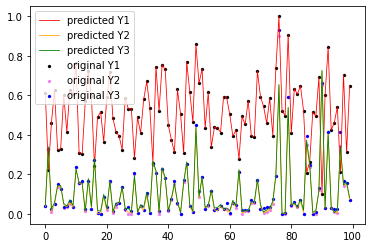

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")

plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.legend()
plt.show()

In [ ]:
Ypred2

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
rmse
#from statistics import mean
#arrmse = mean(rmse)
#arrmse

Y1    0.000856
Y2    0.027327
Y3    0.031166
dtype: float64

In [ ]:
from statistics import mean
arrmse = mean(rmse)
arrmse

0.019783106122845815

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)

Mean absolute error :  0.007047094419196094


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)

R2:  0.9741410718117248


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

RMSE for Ypred2 is 0.02393613306073185
